In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from saveload import saveload as sl
from os import path
from os import listdir
from os.path import isfile, join

# Load the Water Balance file
and format the dataframe

In [2]:
fname = "BASINAVG1"
trial = 'Test'
fRead = "../Model/Config_PointScale/"+fname+"/Basin_average_water_balance.csv"
WB = pd.read_csv(fRead, skipinitialspace=True)
WB = WB.drop(columns="Unnamed: 36")
WB

,YEAR,DAY,PREACC,EVAPACC,ROFACC,ROFOACC,ROFSACC,ROFBACC,DSTGACC,PRE,...,LQWS3,FRWS3,ALWS3,LQWS,FRWS,ALWS,LZS,DZS,STG,DSTG
0,1998,274,0.000000,0.151475,0.103985,0.0000,0.0,0.103985,-0.106873,0.000000,...,416.1351,0.0,416.1351,437.4503,22.391630,459.8419,0.0,0.0,488.8741,-0.106873
1,1998,275,0.000000,0.546130,0.207006,0.0000,0.0,0.207006,-0.291809,0.000000,...,415.7934,0.0,415.7934,442.1796,21.689950,463.8695,0.0,0.0,488.5044,-0.369721
2,1998,276,3.041093,2.078949,0.309074,0.0000,0.0,0.309074,0.050842,3.041093,...,415.4515,0.0,415.4515,449.1229,19.186320,468.3092,0.0,0.0,489.7168,1.212402
3,1998,277,5.999998,2.523778,0.410497,0.0000,0.0,0.410497,0.536774,2.958905,...,415.2394,0.0,415.2394,457.4400,15.327140,472.7671,0.0,0.0,490.9753,1.258514
4,1998,278,5.999998,2.811756,0.511661,0.0000,0.0,0.511661,1.007874,0.000000,...,415.1977,0.0,415.1977,465.4016,10.835280,476.2369,0.0,0.0,491.8730,0.897675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2003,270,2124.523000,1858.568000,399.212800,276.3158,0.0,122.856000,-41.533450,0.000000,...,281.5665,0.0,281.5665,356.2737,0.000000,356.2737,0.0,0.0,356.2747,-0.664551
1823,2003,271,2124.523000,1859.401000,399.216600,276.3158,0.0,122.859200,-41.583590,0.000000,...,284.2836,0.0,284.2836,355.3864,0.000000,355.3864,0.0,0.0,355.3865,-0.888214
1824,2003,272,2124.523000,1860.058000,399.220500,276.3158,0.0,122.862800,-41.633670,0.000000,...,286.3430,0.0,286.3430,354.6073,0.000000,354.6073,0.0,0.0,354.6073,-0.779144
1825,2003,273,2128.052000,1861.212000,399.228200,276.3197,0.0,122.866700,-41.684420,3.528574,...,287.9146,0.0,287.9146,354.1070,0.000192,354.1072,0.0,0.0,354.3013,-0.306061


In [3]:
startYear = WB['YEAR'][1]
startYear
endYear = WB['YEAR'][len(WB.index)-1]
endYear

2003

In [4]:
Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

0      1998-10-01
1      1998-10-02
2      1998-10-03
3      1998-10-04
4      1998-10-05
          ...    
1822   2003-09-27
1823   2003-09-28
1824   2003-09-29
1825   2003-09-30
1826   2003-10-01
Length: 1827, dtype: datetime64[ns]

In [5]:
WB.columns

Index(['YEAR', 'DAY', 'PREACC', 'EVAPACC', 'ROFACC', 'ROFOACC', 'ROFSACC',
       'ROFBACC', 'DSTGACC', 'PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB',
       'SNCAN', 'RCAN', 'SNO', 'WSNO', 'PNDW', 'LQWS1', 'FRWS1', 'ALWS1',
       'LQWS2', 'FRWS2', 'ALWS2', 'LQWS3', 'FRWS3', 'ALWS3', 'LQWS', 'FRWS',
       'ALWS', 'LZS', 'DZS', 'STG', 'DSTG'],
      dtype='object')

# Create a water balance plot

In [6]:
# Prep the dataframe

index = pd.date_range(Dates[0], periods = len(WB), freq="D")
index

WB2 = WB[['PRE', 'EVAP', 'ROF', 'ROFO', 'ROFS', 'ROFB']]
WB2.index = index

WB2 = WB2.resample('Y').sum()
WB2['dS'] = WB2['PRE'] - WB2['EVAP'] - WB2['ROF']
WB2
WB2['negdS'] = np.where(WB2['dS'] < 0, WB2['dS']*-1, 0)
WB2['posdS'] = np.where(WB2['dS'] > 0, WB2['dS'], 0)
WB2


,PRE,EVAP,ROF,ROFO,ROFS,ROFB,dS,negdS,posdS
1998-12-31,80.099973,25.200987,25.678491,11.163429,0.0,14.515064,29.220495,0.000000,29.220495
1999-12-31,488.131293,377.940400,102.838872,60.784092,0.0,42.054779,7.352021,0.000000,7.352021
2000-12-31,412.053420,351.750577,69.519052,21.494288,0.0,48.024766,-9.216209,9.216209,0.000000
2001-12-31,445.251385,412.627204,57.832312,43.638956,0.0,14.193354,-25.208131,25.208131,0.000000
2002-12-31,290.145010,323.259093,66.945492,63.145650,0.0,3.799851,-100.059576,100.059576,0.000000
2003-12-31,421.103439,372.431624,76.401763,76.118160,0.0,0.283603,-27.729948,27.729948,0.000000


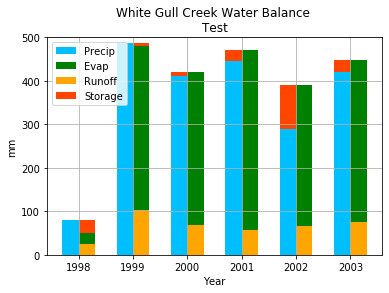

In [7]:
# Make the plot

w = 0.3
a = 'edge'
x = WB2.index.year
 
plt.bar(x, WB2['negdS'], align=a, width=-w, color='orangered', bottom=WB2['PRE'])
plt.bar(x, WB2['PRE'], align=a, width=-w, label='Precip', color='deepskyblue')
plt.bar(x, WB2['EVAP'], align=a, width=w, label='Evap', bottom=WB2['ROF'], color='g')
plt.bar(x, WB2['ROF'], align=a, width=w, label='Runoff', color='orange')
plt.bar(x, WB2['posdS'], align=a, width=w, color='orangered', label='Storage', bottom=WB2['EVAP']+WB2['ROF'])
plt.legend(loc='upper left')
plt.grid()
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('mm')
plt.title('White Gull Creek Water Balance \n'+trial)
plt.ylim(0, 500)
# plt.figure(num=None, figsize=(16, 12), dpi=80)

plt.savefig(trial+'.png', dpi=200)
plt.show()

# Create a water balance table

In [8]:
# Create a table of totals for each variable (precip, evaporation, runoff (overland, interflow, and baseflow), 
# and change in storage)
P_tot = WB['PREACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
RO_tot = WB['ROFACC'][WB.index[-1]]
RO_tot_Overland = WB['ROFOACC'][WB.index[-1]]
RO_tot_Interflow = WB['ROFSACC'][WB.index[-1]]
RO_tot_Baseflow = WB['ROFBACC'][WB.index[-1]]
E_tot = WB['EVAPACC'][WB.index[-1]]
dS = P_tot - E_tot - RO_tot
dS

data = [['Total Precip', P_tot], ['Total Evap', E_tot], ['Total Runoff', RO_tot], ['Total Overland', RO_tot_Overland], 
        ['Total Interflow', RO_tot_Interflow], ['Total Baseflow ', RO_tot_Baseflow], ['Delta Storage', dS]]
Summary = pd.DataFrame(data, columns = ['Variable', 'Value'])
Summary.index = Summary.Variable
del Summary['Variable']
Summary


,Value
Variable,
Total Precip,2136.7810
Total Evap,1863.1990
Total Runoff,399.2566
Total Overland,276.3443
Total Interflow,0.0000
Total Baseflow,122.8706
Delta Storage,-125.6746


In [9]:
# Save the totals table to a html file
# *** NOT COMPLETE ***

from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# table(Summary, cellText=Summary.Value, rowLabels=Summary.index, colLables=Summary.columns)
# table(ax, Summary)
# table()

# Summary.to_png(Trial+'.png')

# Compare outputs with observed data

## Load Soil VWC and Soil Temp Observations

In [10]:
# List the files in the directory

mypath = "..\\Data\\Raw\\Validation"

import glob
pathlistWC = glob.glob(mypath + "/*SoilVWC*.csv")
pathlistWC # for volumetric water content observations

pathlistT = glob.glob(mypath + "/*SoilTemp*.csv")
pathlistT # for soil temperature observations

# Obtained the import code from this site (not first answer): 
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory/3207254



['..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_005cmNE_11.DailyMean.CSV',
 '..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_005cmNW_11.DailyMean.CSV',
 '..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_020cmNE_11.DailyMean.CSV',
 '..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_020cmNW_11.DailyMean.CSV',
 '..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_100cmNE_11.DailyMean.CSV',
 '..\\Data\\Raw\\Validation\\BER_OBS_07_SoilTemp_100cmNW_11.DailyMean.CSV']

In [11]:
# Create an inital dataframe for vwc

# Obtain the observation name from the file name
num=0

name = pathlistWC[num]
import re
start = name.find('Soil')
end = name.find('11')-1
name = name[start:end]
name

'SoilVWC_02.5cmNE'

In [12]:
# Load the data frame and rename columns according to file name
vwc = pd.read_csv(pathlistWC[num], usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
# vwc1.columns.values[0]="Date_"+name
vwc.columns.values[1]=name
vwc.index = vwc["Date"]
vwc = vwc.drop(columns=["Date",name])
vwc

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [13]:
# Put all the observed VWC data in one dataframe
import re

for f in pathlistWC:
    name = f
    start = name.find('Soil')
    end = name.find('11')-1
    name = name[start:end]
    vwcX = pd.read_csv(f, usecols=['Date', 'Value [Cubic meter per cubic meter]'], na_values=["---"])
    vwcX.columns.values[1]=name
    vwcX.index = vwcX["Date"]
    vwcX = vwcX.drop(columns="Date")
    vwc = pd.concat([vwc,vwcX.iloc[:,0]], axis=1)
    
vwc['Date'] = vwc.index
vwc
   

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date
Date,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29


In [14]:
# Calculate the average of the 2.5cm and 7.5cm measurements to use as the vwc for the first layer @ 5cm depth

vwc["SoilVWC_05.0cmNE"] = vwc[["SoilVWC_02.5cmNE","SoilVWC_07.5cmNE"]].mean(axis=1)
vwc["SoilVWC_05.0cmNW"] = vwc[["SoilVWC_02.5cmNW","SoilVWC_07.5cmNW"]].mean(axis=1)
vwc

# df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)

,SoilVWC_02.5cmNE,SoilVWC_02.5cmNW,SoilVWC_07.5cmNE,SoilVWC_07.5cmNW,SoilVWC_22.5cmNE,SoilVWC_22.5cmNW,SoilVWC_60to90cmNE,SoilVWC_60to90cmNW,Date,SoilVWC_05.0cmNE,SoilVWC_05.0cmNW
Date,,,,,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01,NaN,NaN
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02,NaN,NaN
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03,NaN,NaN
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04,NaN,NaN
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.145948,0.028168,0.098116,0.025158,0.135809,0.180573,0.685408,0.239947,2019-12-27,0.122032,0.026663
2019-12-28,0.145378,0.028029,0.094234,0.024726,0.131020,0.178727,0.685463,0.240244,2019-12-28,0.119806,0.026377
2019-12-29,0.145319,0.027964,0.091828,0.024542,0.125688,0.176326,0.684489,0.240295,2019-12-29,0.118573,0.026253


## Unit conversion for modelled Soil VWC

In [15]:
# Create a new dataframe of just the LQWS values
LQWS = WB[["LQWS1", "LQWS2", "LQWS3"]]
# Units are in kg/m2
LQWS.index = index
LQWS.loc[:,"VWC_S1"] = LQWS["LQWS1"]/1000/0.1
LQWS.loc[:,"VWC_S2"] = LQWS["LQWS2"]/1000/0.25
LQWS.loc[:,"VWC_S3"] = LQWS["LQWS3"]/1000/3.75
LQWS.loc[:,'Date'] = LQWS.index
LQWS

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,LQWS1,LQWS2,LQWS3,VWC_S1,VWC_S2,VWC_S3,Date
1998-10-01,5.678567,15.63663,416.1351,0.056786,0.062547,0.110969,1998-10-01
1998-10-02,10.158990,16.22721,415.7934,0.101590,0.064909,0.110878,1998-10-02
1998-10-03,15.392460,18.27892,415.4515,0.153925,0.073116,0.110787,1998-10-03
1998-10-04,18.004770,24.19584,415.2394,0.180048,0.096783,0.110731,1998-10-04
1998-10-05,18.345880,31.85807,415.1977,0.183459,0.127432,0.110719,1998-10-05
...,...,...,...,...,...,...,...
2003-09-27,19.464870,55.24231,281.5665,0.194649,0.220969,0.075084,2003-09-27
2003-09-28,18.809830,52.29299,284.2836,0.188098,0.209172,0.075809,2003-09-28
2003-09-29,18.320710,49.94354,286.3430,0.183207,0.199774,0.076358,2003-09-29
2003-09-30,18.106180,48.08626,287.9146,0.181062,0.192345,0.076777,2003-09-30


## Load Soil T Observations

In [16]:
# Create an inital dataframe for temp

# Obtain the observation name from the file name
num=0

nameT = pathlistT[num]
import re
start = nameT.find('Soil')
end = nameT.find('11')-1
nameT = nameT[start:end]
nameT

'SoilTemp_005cmNE'

In [17]:
# Load the data frame and rename columns according to file name
soilT = pd.read_csv(pathlistT[num], usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
soilT.columns.values[1]=nameT
soilT.index = soilT["Date"]
soilT = soilT.drop(columns=["Date",nameT])
soilT

""
Date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2019-12-27
2019-12-28
2019-12-29


In [18]:
# Put all the observed Soil Temp data in one dataframe

for f in pathlistT:
    nameT = f
    start = nameT.find('Soil')
    end = nameT.find('11')-1
    nameT = nameT[start:end]
    soilTX = pd.read_csv(f, usecols=['Date', 'Value [degree Celsius]'], na_values=["---"])
    soilTX.columns.values[1]=nameT
    soilTX.index = soilTX["Date"]
    soilTX = soilTX.drop(columns="Date")
    soilT = pd.concat([soilT,soilTX.iloc[:,0]], axis=1)
    
soilT['Date'] = soilT.index
soilT

,SoilTemp_005cmNE,SoilTemp_005cmNW,SoilTemp_020cmNE,SoilTemp_020cmNW,SoilTemp_100cmNE,SoilTemp_100cmNW,Date
Date,,,,,,,
1997-10-01,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-01
1997-10-02,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-02
1997-10-03,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-03
1997-10-04,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-04
1997-10-05,NaN,NaN,NaN,NaN,NaN,NaN,1997-10-05
...,...,...,...,...,...,...,...
2019-12-27,-0.733545,-1.943040,0.003022,0.319977,1.243727,NaN,2019-12-27
2019-12-28,-0.798579,-2.176121,-0.011731,0.305939,1.216367,NaN,2019-12-28
2019-12-29,-0.831033,-2.293746,-0.020851,0.288160,1.189121,NaN,2019-12-29


## Load Energy Balance file

In [19]:
trial = 'Test'
fRead = "../Model/Config_PointScale/"+fname+"/Basin_average_energy_balance.csv"
EB = pd.read_csv(fRead, skipinitialspace=True)
EB = EB.drop(columns="Unnamed: 19")
EB

,YEAR,DAY,FSIN,FSOUT,ALBT,FLIN,FLOUT,GTE,QH,QE,GZERO,TA,TCAN,CMAS,TSNOW,TPOND,TBAR1,TBAR2,TBAR3
0,1998,274,157.47300,137.27070,0.077995,275.2551,332.6975,3.399780,51.571150,4.357460,-1.956115,6.000885,4.989288,7.0,-2.768677,0.0,-1.302612,0.000061,4.765411
1,1998,275,152.69290,134.05420,0.082122,260.1313,337.2981,4.478485,27.286440,11.423990,3.620135,5.404816,5.895355,7.0,-0.231750,0.0,0.000061,0.000061,4.712585
2,1998,276,94.06191,82.88400,0.067951,301.5302,336.9026,4.448303,-17.542950,44.370150,8.194694,5.572052,5.548920,7.0,0.000061,0.0,0.000061,0.000061,4.660858
3,1998,277,28.25882,25.03461,0.077766,339.8014,337.5753,4.637024,-8.351130,12.876350,11.715530,6.151001,5.720154,7.0,0.000061,0.0,0.000061,0.000061,4.610718
4,1998,278,31.74395,28.22986,0.063799,338.0064,335.3902,4.164154,4.376596,8.335926,12.904410,7.084106,5.104370,7.0,0.000061,0.0,0.000061,0.000061,4.560699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2003,270,157.30330,139.82540,0.072923,268.0171,339.4418,4.920776,38.054830,26.655510,1.725474,5.178162,5.121490,7.0,0.000000,0.0,4.395538,4.767517,9.648193
1823,2003,271,118.04040,104.79730,0.074994,280.7279,338.5095,4.808533,28.462240,24.122100,-4.919144,3.986359,4.799835,7.0,0.000000,0.0,4.963074,5.335968,9.589600
1824,2003,272,105.53990,93.73983,0.089491,258.3048,322.9742,1.536926,30.940960,19.017100,-19.620740,1.016022,1.185730,7.0,0.000000,0.0,3.131836,4.531708,9.536987
1825,2003,273,165.74540,147.22680,0.077181,255.6722,328.8351,2.683136,55.727620,33.495220,-4.426008,3.122070,2.760986,7.0,0.000000,0.0,2.674622,3.358795,9.471985


In [20]:
EB.columns

Index(['YEAR', 'DAY', 'FSIN', 'FSOUT', 'ALBT', 'FLIN', 'FLOUT', 'GTE', 'QH',
       'QE', 'GZERO', 'TA', 'TCAN', 'CMAS', 'TSNOW', 'TPOND', 'TBAR1', 'TBAR2',
       'TBAR3'],
      dtype='object')

In [21]:
startYear = WB['YEAR'][1]
startYear
endYear = WB['YEAR'][len(WB.index)-1]
endYear

Dates = pd.to_datetime(WB['YEAR'] * 1000 + WB['DAY'], format='%Y%j')
Dates[0]
Dates

index = pd.date_range(Dates[0], periods = len(EB), freq="D")
index

EB2 = EB[['QH', 'QE', 'TBAR1', 'TBAR2', 'TBAR3']]
# Units: QH and QE are in W/m2, TBAR in C for middle of the soil layer
# Note: the wiki (https://wiki.usask.ca/display/MESH/Variable+List) says that TBAR is in K, but the
# values in this instance are clearly in oC

EB2.index = index
EB2

,QH,QE,TBAR1,TBAR2,TBAR3
1998-10-01,51.571150,4.357460,-1.302612,0.000061,4.765411
1998-10-02,27.286440,11.423990,0.000061,0.000061,4.712585
1998-10-03,-17.542950,44.370150,0.000061,0.000061,4.660858
1998-10-04,-8.351130,12.876350,0.000061,0.000061,4.610718
1998-10-05,4.376596,8.335926,0.000061,0.000061,4.560699
...,...,...,...,...,...
2003-09-27,38.054830,26.655510,4.395538,4.767517,9.648193
2003-09-28,28.462240,24.122100,4.963074,5.335968,9.589600
2003-09-29,30.940960,19.017100,3.131836,4.531708,9.536987
2003-09-30,55.727620,33.495220,2.674622,3.358795,9.471985


# Initial plots

<function matplotlib.pyplot.show(*args, **kw)>

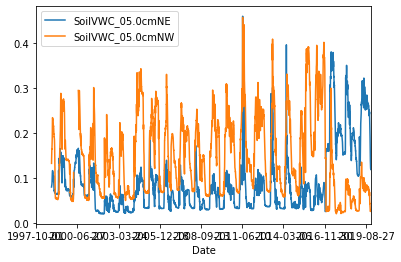

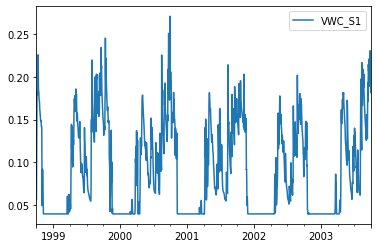

In [22]:
# Initial plots

vwc.plot(kind='line', y=["SoilVWC_05.0cmNE", "SoilVWC_05.0cmNW"])
LQWS.plot(kind='line', y="VWC_S1")
plt.show

# The method above is using the Pandas plotting function, not the pyplot functions.

In [ ]:
# Try to put the vwc and LQWS lines on the same plot
